In [1]:
import pandas as pd

In [2]:
home_df = pd.read_csv('../Source/Metro_Home_Values.csv')
home_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31
0,102001,0,United States,country,NaN,123951.733006,124163.176264,124425.524492,124988.958362,125637.500450,...,355986.448327,356640.365507,357118.576760,357576.035711,358418.372959,360011.602927,361969.362164,3.635033e+05,3.641659e+05,3.643848e+05
1,394913,1,"New York, NY",msa,NY,219657.598399,220586.011622,221519.660004,223407.993412,225353.501267,...,656116.650291,658992.330717,662322.088290,665541.460972,669925.455906,675684.524493,682290.159549,6.873056e+05,6.905686e+05,6.932481e+05
2,753899,2,"Los Angeles, CA",msa,CA,236649.976987,237553.116159,238728.814647,241071.926563,243614.826354,...,978656.081035,988006.132016,993962.586203,994044.629696,990763.189872,989599.749912,993777.833894,1.000601e+06,1.005222e+06,1.010107e+06
3,394463,3,"Chicago, IL",msa,IL,159899.676257,160054.921113,160340.806271,161051.946252,161901.787792,...,328270.794339,329219.545752,329991.513159,330838.545303,332482.161364,335195.288195,338356.149580,3.407269e+05,3.421063e+05,3.429366e+05
4,394514,4,"Dallas, TX",msa,TX,129057.198121,129114.277857,129184.712729,129363.326656,129593.351700,...,380533.777024,380382.508383,380056.886976,380085.827764,380580.411239,381762.207346,382759.281581,3.829150e+05,3.822440e+05,3.812958e+05


In [3]:
# Define the columns to keep:
# First five columns
columns_to_keep = home_df.columns[:5]

# Extract year from columns and identify columns for 2022, 2023, and 2024
def extract_year_from_column(col_name):
    try:
        return col_name.split('-')[0]  # Extract year from 'YYYY-MM-DD'
    except IndexError:
        return None

# Create a set of years to keep
years_to_keep = {'2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'}

# Filter columns to keep only those starting with the specified years
columns_for_years = [col for col in home_df.columns if extract_year_from_column(col) in years_to_keep]

# Combine the columns to keep
all_columns_to_keep = list(columns_to_keep) + columns_for_years

# Filter DataFrame
home_df_filtered = home_df[all_columns_to_keep]
home_df_filtered.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,102001,0,United States,country,NaN,179380.231213,180219.971092,181059.198750,181896.725271,182862.238189,...,345613.577117,346691.188602,348427.543021,350445.545587,352244.198336,353877.420485,355084.172098,355986.448327,356640.365507,357118.576760
1,394913,1,"New York, NY",msa,NY,390054.077489,391755.998469,394145.644700,396842.311812,399450.787345,...,630846.093580,633668.487396,638326.217830,642877.024023,646700.894903,650253.819740,653280.438031,656116.650291,658992.330717,662322.088290
2,753899,2,"Los Angeles, CA",msa,CA,502199.528146,503520.388093,503879.032811,505527.154635,507790.101836,...,912800.969373,910445.274641,914842.336079,923630.781051,936154.461507,951170.550320,966180.160299,978656.081035,988006.132016,993962.586203
3,394463,3,"Chicago, IL",msa,IL,193580.074913,194939.528116,196167.127966,197336.028233,198577.560974,...,312957.110344,314879.540011,317202.480876,319917.675213,322623.008244,325147.063505,326938.470339,328270.794339,329219.545752,329991.513159
4,394514,4,"Dallas, TX",msa,TX,163847.518400,165019.405604,166126.478371,167012.250204,167930.362297,...,377513.333757,376966.644414,377273.255286,378120.995203,379119.091390,380046.606921,380443.619087,380533.777024,380382.508383,380056.886976


In [4]:
# Sort by state names and drop unnecessary columns
df_sorted = home_df_filtered.sort_values(by='StateName')
df_sorted.drop(['RegionType', 'SizeRank', 'RegionID'], axis = 1, inplace = True)
df_sorted.head()

,RegionName,StateName,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
136,"Anchorage, AK",AK,282570.628176,281675.662776,281045.574811,281755.880974,282798.097189,283562.738095,284326.523265,285279.756884,...,383637.288177,385209.008548,387305.516563,390001.125150,391940.939695,393517.536767,394093.371797,394330.800010,394012.886892,393544.160830
891,"Ketchikan, AK",AK,281729.059292,282639.143316,283025.172072,283356.869063,283718.407200,284394.839211,285844.751862,287225.356185,...,435122.242409,433701.247829,433950.968387,435581.649206,437159.721993,436510.099742,434086.518550,430162.304681,426865.266476,423965.648960
774,"Juneau, AK",AK,369575.770002,370350.863946,371230.996203,371811.945411,372524.525664,373247.533803,374048.092163,374979.019313,...,499046.319108,498926.561700,500374.221266,503381.703559,505843.619433,508998.723500,509758.466007,509545.181010,508154.074640,507603.959231
395,"Fairbanks, AK",AK,225378.332865,224911.389420,224665.750440,224625.871761,225331.626002,225330.114420,224959.334426,224523.782607,...,301895.894929,301714.398730,301809.477885,302939.638219,304343.604722,305058.507428,304300.775935,302765.218698,301418.616903,300155.532760
284,"Florence, AL",AL,121654.680863,121762.594809,121440.283645,121073.984595,120626.465773,120264.353114,120223.755634,120257.315312,...,191942.906976,193444.281591,195303.156222,197100.545135,198058.082161,198345.654797,198339.335627,198631.654936,199564.824692,200476.650080


In [5]:
# Filter out for only the needed columns
# End of the year price and state/region name
columns_to_keep = ['RegionName', 'StateName', '2014-12-31' ,'2015-12-31' ,'2016-12-31', '2017-12-31' ,'2018-12-31' ,'2019-12-31','2020-12-31' ,'2021-12-31','2022-12-31', '2023-12-31']
df_all = df_sorted[columns_to_keep]

# Round only numeric columns to 2 decimal places
numeric_columns = df_all.select_dtypes(include='number').columns
df_all.loc[:, numeric_columns] = df_all.loc[:, numeric_columns].round()
df_all.head()

,RegionName,StateName,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31,2023-12-31
136,"Anchorage, AK",AK,292084.0,304367.0,306156.0,307095.0,307020.0,338265.0,343492.0,364717.0,382152.0,393544.0
891,"Ketchikan, AK",AK,290698.0,306531.0,318358.0,327452.0,346213.0,373651.0,396724.0,419296.0,443586.0,423966.0
774,"Juneau, AK",AK,380605.0,403277.0,412302.0,421048.0,425964.0,433965.0,449035.0,488450.0,508736.0,507604.0
395,"Fairbanks, AK",AK,223557.0,232134.0,242141.0,255656.0,256351.0,278991.0,286960.0,301059.0,306237.0,300156.0
284,"Florence, AL",AL,120056.0,124751.0,127959.0,130642.0,132089.0,138400.0,153882.0,177209.0,192008.0,200477.0


In [6]:
# Filter for US data as a whole
us_df = df_all[df_all['RegionName'] == 'United States']
us_filtered = us_df.drop(['StateName'], axis = 1)
us_filtered

,RegionName,2014-12-31,2015-12-31,2016-12-31,2017-12-31,2018-12-31,2019-12-31,2020-12-31,2021-12-31,2022-12-31,2023-12-31
0,United States,187409.0,199274.0,210242.0,223670.0,236621.0,248514.0,272764.0,316156.0,347626.0,357119.0


In [7]:
column_rename_dict = {
    '2014-12-31': '2014',
    '2015-12-31': '2015',
    '2016-12-31': '2016',
    '2017-12-31': '2017',
    '2018-12-31': '2018',
    '2019-12-31': '2019',
    '2020-12-31': '2020',
    '2021-12-31': '2021',
    '2022-12-31': '2022',
    '2023-12-31': '2023'
}
us_filtered = us_filtered.rename(columns=column_rename_dict)
us_filtered

,RegionName,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,United States,187409.0,199274.0,210242.0,223670.0,236621.0,248514.0,272764.0,316156.0,347626.0,357119.0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

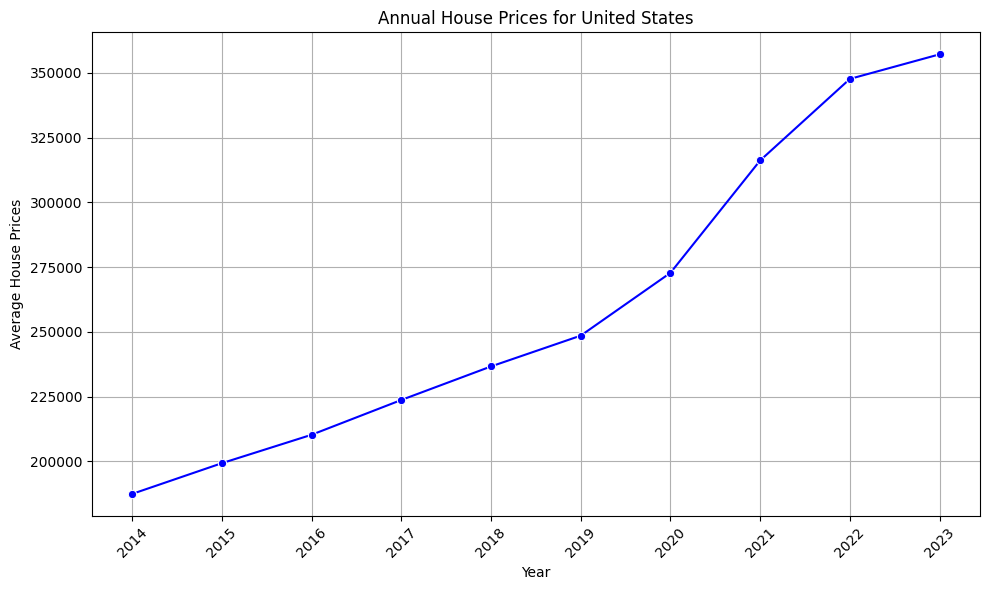

In [20]:
# Drop the 'RegionName' column
us_df = us_filtered.drop(columns='RegionName')

# Transpose the DataFrame to have years as index
us_df = us_df.T
us_df.columns = ['Value']
us_df.index.name = 'Year'
us_df.reset_index(inplace=True)

# Handle any inf values by replacing them with NaN, then dropping NaN rows
us_df.replace([np.inf, -np.inf], np.nan, inplace=True)
us_df.dropna(inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', data=us_df, marker='o', color='b')
plt.title('Annual House Prices for United States')
plt.xlabel('Year')
plt.ylabel('Average House Prices')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../IMAGES/US_prices_line.png")
plt.show()

In [13]:
gdp_all_df = pd.read_csv('../Source/GDP_all_years.csv')
gdp_all_df.head()

,GeoFips,GeoName,1997,1998,1999,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,0,United States,12370299.0,12924876.0,13543774.0,14096033.0,14230726.0,14472712.0,14877312.0,15449757.0,...,18261714.0,18799622.0,19141672.0,19612102.0,20193896.0,20692087.0,20234074.0,21407692.0,21822037.0,22376906.0
1,1000,Alabama,154700.0,160396.4,166531.8,168695.3,168448.3,172430.4,178040.0,189913.7,...,206070.0,208950.3,212862.8,216615.5,220808.8,224944.6,222081.4,231892.6,235807.3,241753.1
2,2000,Alaska,41071.0,40263.7,39783.1,38428.1,40014.4,41904.7,41235.0,42880.1,...,53303.3,53681.1,53463.9,53550.9,52479.6,52325.3,50344.6,51021.8,50315.1,53006.3
3,4000,Arizona,180293.9,197492.1,214293.9,224729.3,230885.6,238257.1,253743.1,264990.0,...,301721.2,308582.8,319008.4,333099.0,346398.3,359645.7,362603.5,390805.2,403474.2,414273.3
4,5000,Arkansas,87180.3,89905.3,94756.9,95509.8,95528.7,98556.6,102948.0,108581.8,...,121409.4,121532.5,123034.9,123882.6,126371.2,127216.0,128061.2,135568.8,137355.5,140784.7


In [14]:
# Define the list of columns to keep
columns_to_keep = ['GeoName'] + [str(year) for year in range(2014, 2024)]

# Select only the desired columns
gdp_filtered = gdp_all_df[columns_to_keep]
gdp_filtered.head()

,GeoName,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,United States,18261714.0,18799622.0,19141672.0,19612102.0,20193896.0,20692087.0,20234074.0,21407692.0,21822037.0,22376906.0
1,Alabama,206070.0,208950.3,212862.8,216615.5,220808.8,224944.6,222081.4,231892.6,235807.3,241753.1
2,Alaska,53303.3,53681.1,53463.9,53550.9,52479.6,52325.3,50344.6,51021.8,50315.1,53006.3
3,Arizona,301721.2,308582.8,319008.4,333099.0,346398.3,359645.7,362603.5,390805.2,403474.2,414273.3
4,Arkansas,121409.4,121532.5,123034.9,123882.6,126371.2,127216.0,128061.2,135568.8,137355.5,140784.7


In [15]:
# Filter out for only US data as a whole
us_gdp = gdp_filtered[gdp_filtered['GeoName'] == 'United States']
us_gdp

,GeoName,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,United States,18261714.0,18799622.0,19141672.0,19612102.0,20193896.0,20692087.0,20234074.0,21407692.0,21822037.0,22376906.0


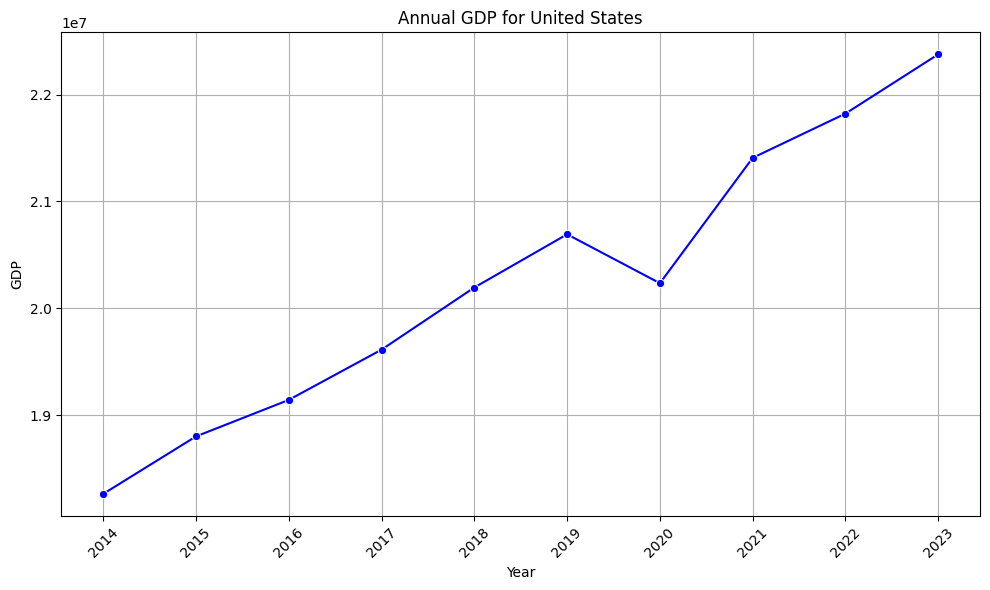

In [21]:
# Drop the 'RegionName' column
us_gdp_df = us_gdp.drop(columns='GeoName')

# Transpose the DataFrame to have years as index
us_gdp_df = us_gdp_df.T
us_gdp_df.columns = ['Value']
us_gdp_df.index.name = 'Year'
us_gdp_df.reset_index(inplace=True)

# Handle any inf values by replacing them with NaN, then dropping NaN rows
us_gdp_df.replace([np.inf, -np.inf], np.nan, inplace=True)
us_gdp_df.dropna(inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', data=us_gdp_df, marker='o', color='b')
plt.title('Annual GDP for United States')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../IMAGES/US_GDP_line.png")
plt.show()

In [17]:
us_gdp_df

,Year,Value
0,2014,18261714.0
1,2015,18799622.0
2,2016,19141672.0
3,2017,19612102.0
4,2018,20193896.0
5,2019,20692087.0
6,2020,20234074.0
7,2021,21407692.0
8,2022,21822037.0
9,2023,22376906.0


In [18]:
us_df

,Year,Value
0,2014,187409.0
1,2015,199274.0
2,2016,210242.0
3,2017,223670.0
4,2018,236621.0
5,2019,248514.0
6,2020,272764.0
7,2021,316156.0
8,2022,347626.0
9,2023,357119.0


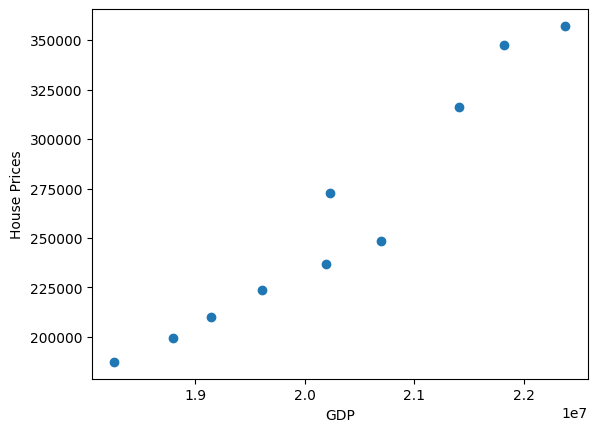

In [19]:
gdp = us_gdp_df['Value']
prices = us_df['Value']
plt.scatter(gdp,prices)
plt.xlabel("GDP")
plt.ylabel("House Prices")
plt.show()

In [22]:
import scipy.stats as st
print(f"The correlation coefficient between GDP and House Prices is {round(st.pearsonr(gdp,prices)[0],2)}")

The correlation coefficient between GDP and House Prices is 0.97
